# クイックソート

In [144]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random
import time

In [138]:
def quick_sort(array):
    N = len(array)
    if N > 2:
        base = array[0]
        i = 1
        j = len(array)-1
        while i < j:
            while i < N and array[i] <= base:
                i += 1
            while 0 < j and base <= array[j]:
                j -= 1
            if i >= j:
                break
            buff = array[i]
            array[i] = array[j]
            array[j] = buff
        buff = array[j]
        array[j] = array[0]
        array[0] = buff
        left = quick_sort(array[:j])
        right = quick_sort(array[j+1:])
        return left + [array[j]] + right        
    elif N == 2:
        if array[0] < array[1]:
            return array
        else:
            return array[::-1]
    else:
        return array

In [139]:
arr=[random.randint(0, 20) for i in range(20)]
quick_sort(arr)

[0, 2, 4, 4, 6, 6, 7, 8, 8, 8, 9, 14, 14, 14, 15, 17, 17, 18, 18, 20]

In [142]:
n_list = []
t_list = []
sorted_before = []
sorted_after = []
for n in [int(math.pow(2, i)) for i in range(7, 19+1)]:
    arr = [random.random() for i in range(n)]
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_before.append(b)
    
    start = time.time()
    arr = quick_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_after.append(b)

pd.DataFrame(data=np.array([n_list, t_list, sorted_before, sorted_after]).T, columns=['array length', 'sort time [s]', 'sorted (before)', 'sorted (after)'])

,array length,sort time [s],sorted (before),sorted (after)
0,128.0,0.000483,0.0,1.0
1,256.0,0.001060,0.0,1.0
2,512.0,0.002130,0.0,1.0
3,1024.0,0.004896,0.0,1.0
4,2048.0,0.011306,0.0,1.0
5,4096.0,0.024565,0.0,1.0
6,8192.0,0.061932,0.0,1.0
7,16384.0,0.113676,0.0,1.0
8,32768.0,0.255461,0.0,1.0
9,65536.0,0.483097,0.0,1.0


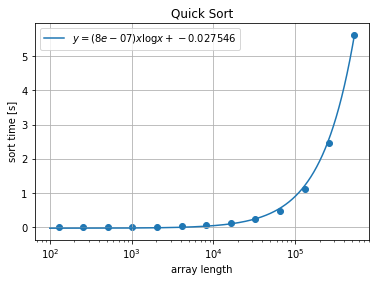

,a
0,8.025157e-07
1,-2.754619e-02


In [145]:
from scipy.optimize import curve_fit
def func_fit(x, a, b):
    return a * x * np.log(x) + b

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(1, int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1])

plt.title('Quick Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x \log{{x}} + {}$'.format(round(param[0], 7), round(param[1], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])